# Feature Engineering - Mutual Information on Automobile Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('Automobile_data.csv')

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [4]:
X=df.drop('price',axis=1)

y=df.price

In [5]:
y.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: object

In [6]:
X = df.copy()
y = X.pop("price")

In [7]:
X['normalized-losses'].values

array(['?', '?', '?', '164', '164', '?', '158', '?', '158', '?', '192',
       '192', '188', '188', '?', '?', '?', '?', '121', '98', '81', '118',
       '118', '118', '148', '148', '148', '148', '110', '145', '137',
       '137', '101', '101', '101', '110', '78', '106', '106', '85', '85',
       '85', '107', '?', '?', '?', '?', '145', '?', '?', '104', '104',
       '104', '113', '113', '150', '150', '150', '150', '129', '115',
       '129', '115', '?', '115', '118', '?', '93', '93', '93', '93', '?',
       '142', '?', '?', '?', '161', '161', '161', '161', '153', '153',
       '?', '?', '?', '125', '125', '125', '137', '128', '128', '128',
       '122', '103', '128', '128', '122', '103', '168', '106', '106',
       '128', '108', '108', '194', '194', '231', '161', '161', '?', '?',
       '161', '161', '?', '?', '161', '161', '161', '119', '119', '154',
       '154', '154', '74', '?', '186', '?', '?', '?', '?', '?', '?',
       '150', '104', '150', '104', '150', '104', '83', '83', '83', '

In [8]:
for i in X['normalized-losses'].values:
    X.replace("?",107.26,inplace=True)

In [9]:
X['normalized-losses'].values

array([107.26, 107.26, 107.26, '164', '164', 107.26, '158', 107.26, '158',
       107.26, '192', '192', '188', '188', 107.26, 107.26, 107.26, 107.26,
       '121', '98', '81', '118', '118', '118', '148', '148', '148', '148',
       '110', '145', '137', '137', '101', '101', '101', '110', '78',
       '106', '106', '85', '85', '85', '107', 107.26, 107.26, 107.26,
       107.26, '145', 107.26, 107.26, '104', '104', '104', '113', '113',
       '150', '150', '150', '150', '129', '115', '129', '115', 107.26,
       '115', '118', 107.26, '93', '93', '93', '93', 107.26, '142',
       107.26, 107.26, 107.26, '161', '161', '161', '161', '153', '153',
       107.26, 107.26, 107.26, '125', '125', '125', '137', '128', '128',
       '128', '122', '103', '128', '128', '122', '103', '168', '106',
       '106', '128', '108', '108', '194', '194', '231', '161', '161',
       107.26, 107.26, '161', '161', 107.26, 107.26, '161', '161', '161',
       '119', '119', '154', '154', '154', '74', 107.26, '186', 1

In [10]:
y[y.eq('?')]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [11]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [12]:
for i in y.values:
    y.replace("?",16845,inplace=True)

In [13]:
cols = df.select_dtypes(exclude=['float']).columns

df[cols] = df[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [14]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [15]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3] 

highway-mpg     0.855526
city-mpg        0.724338
length          0.550310
stroke          0.417770
bore            0.303679
peak-rpm        0.241150
make            0.187608
body-style      0.040908
num-of-doors    0.000000
Name: MI Scores, dtype: float64

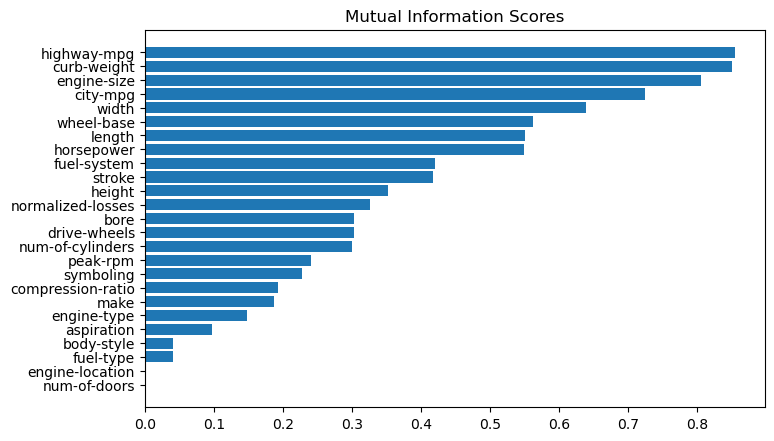

In [16]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

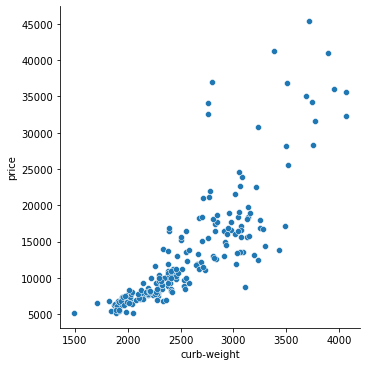

In [17]:
sns.relplot(x="curb-weight", y="price", data=df)

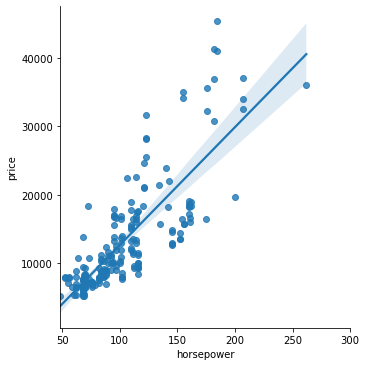

In [18]:
sns.lmplot(x="horsepower", y="price", data=df)